In [374]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import xgboost
import sklearn
import marko

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Récupération des données

In [159]:
X = pickle.load(open("Data/X.pickle", "rb"))
y = pickle.load(open("Data/y.pickle", "rb"))

### Création Dataframe de résultats

In [160]:
df_res = pd.DataFrame(columns = ["étape", "dummy_mean", "linear Regression", "xgboost", "comments"])

In [146]:
def add_res(df, etape, res_dummy, res_lr, res_xg, comment):
    
    new_row = {"étape": etape, "dummy_mean":res_dummy, "linear Regression":res_lr, 
               "xgboost":res_xg, "comments" :comment}
    df = df.append(new_row, ignore_index=True)

# E1 - Création d'un Baseline

In [161]:
X = pd.get_dummies(X.drop(["Coord"], axis = 1), drop_first = True)
y = y["SiteEnergyUseWN(kBtu)"]

## Echantillonage train / test

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =35)

## 1- Dummy Mean

In [163]:
dummy_mean = DummyRegressor(strategy = "mean")
dummy_mean.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [164]:
dmean_RMSE = mean_squared_error(dummy_mean.predict(X_test), y_test, squared = False)
dmean_RMSE

14974347.382464824

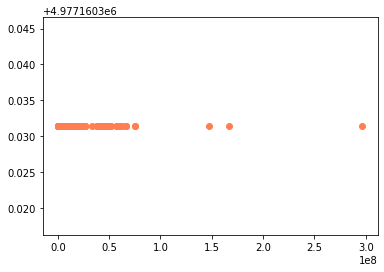

In [112]:
plt.scatter(y_test, dummy_mean.predict(X_test), color = "coral")

## 2 - Regression linéaire basique

Score d'une regression linéaire à partir de nos données en l'état

In [165]:
lr_base = LinearRegression()
lr_base.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
base_RMSE_lr = mean_squared_error(lr_base.predict(X_test), y_test, squared = False)
base_RMSE_lr

8615943.64858807

In [115]:
y.describe()

count    3.798000e+03
mean     5.114085e+06
std      1.367921e+07
min      1.726000e+04
25%      9.815622e+05
50%      1.903846e+06
75%      4.329365e+06
max      2.966717e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64

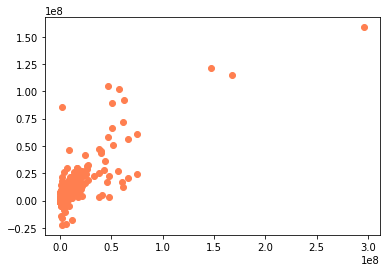

In [116]:
plt.scatter(y_test, lr_base.predict(X_test), color = "coral")

## 3 - XGBoost

In [168]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
base_RMSE_xg = mean_squared_error(xgb.predict(X_test), y_test, squared = False)
base_RMSE_xg

7392101.743827021

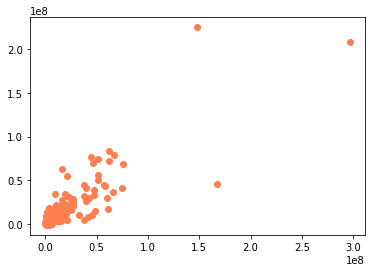

In [169]:
plt.scatter(y_test, xgb.predict(X_test), color = "coral")

In [170]:
com_e1 = "Création d'une baseline avec, dummy_mean, LR, XGB par défaut à partir du dataset de base"

new_row_e1 = {"étape": "E1", "dummy_mean":dmean_RMSE, "linear Regression":base_RMSE_lr, 
           "xgboost":base_RMSE_xg, "comments" :com_e1}
df_res = df_res.append(new_row_e1, ignore_index=True)

In [171]:
df_res

,étape,dummy_mean,linear Regression,xgboost,comments
0,E1,1.497435e+07,8.615944e+06,7.392102e+06,"Création d'une baseline avec, dummy_mean, LR, ..."


## 4 - Reg Ln Selected Feat

In [61]:
X = pickle.load(open("Data/X.pickle", "rb"))
y = pickle.load(open("Data/y.pickle", "rb"))

In [62]:
liste = ['LargestPropertyUseType', 'PrimaryPropertyType', 'ThirdLargestPropertyUseType', 
         'BuildingType', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal']

In [63]:
X = X[liste]

In [64]:
X = pd.get_dummies(X, drop_first = True)

y = y["SiteEnergyUseWN(kBtu)"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =35)

In [66]:
lr_SF = LinearRegression()
lr_SF.fit(X_train, y_train)
baseline_RMSE_SF = mean_squared_error(lr_SF.predict(X_test), y_test, squared = False)
baseline_RMSE_SF

8399654.000119906

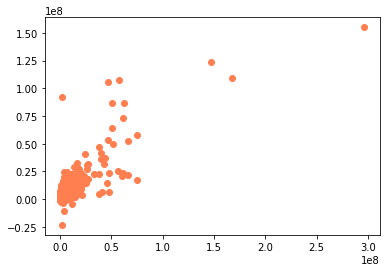

In [67]:
plt.scatter(y_test, lr_SF.predict(X_test), color = "coral")

# Bon, qu'est-ce qu'on fait ?

## E2 - FE1-Passage aux logs

In [194]:
X = pickle.load(open("Data/X.pickle", "rb"))
y = pickle.load(open("Data/y.pickle", "rb"))

In [195]:
X.describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyBuildingGFARate,L_PUTGFA,S_PUTGFA,T_PUTGFA
count,3798.000000,3798.000000,3.798000e+03,3798.000000,3798.000000,3798.000000,3798.000000
mean,1.091101,4.798841,9.284734e+04,0.933266,0.859900,0.117421,0.016280
std,0.860033,5.193093,1.468745e+05,0.133352,0.262358,0.156017,0.048378
min,1.000000,1.000000,1.630000e+04,0.104977,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.935100e+04,0.968342,0.719013,0.000000,0.000000
50%,1.000000,4.000000,4.519650e+04,1.000000,0.938025,0.000000,0.000000
75%,1.000000,5.000000,9.376725e+04,1.000000,1.000000,0.221382,0.000000
max,27.000000,76.000000,2.200000e+06,1.000143,6.426849,1.452054,0.489796


In [39]:
X.columns[15:]

Index(['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyBuildingGFARate', 'L_PUTGFA', 'S_PUTGFA', 'T_PUTGFA', 'Coord'],
      dtype='object')

NumberofBuildings ---------------------------

count    3798.000000
mean        1.091101
std         0.860033
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        27.000000
Name: NumberofBuildings, dtype: float64



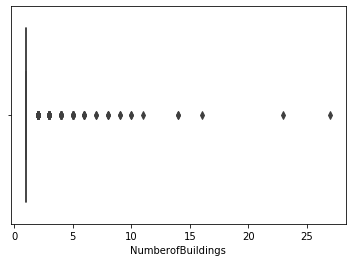

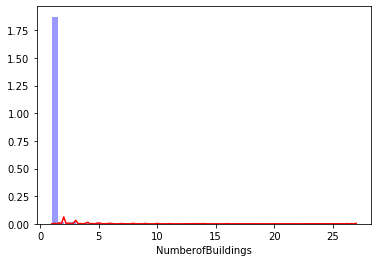


NumberofFloors ---------------------------

count    3798.000000
mean        4.798841
std         5.193093
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        76.000000
Name: NumberofFloors, dtype: float64



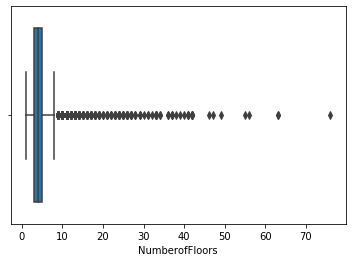

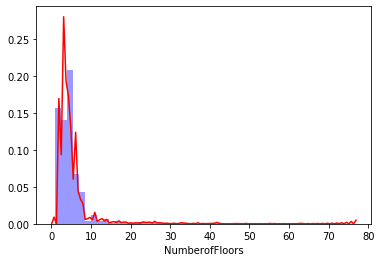


PropertyGFATotal ---------------------------

count    3.798000e+03
mean     9.284734e+04
std      1.468745e+05
min      1.630000e+04
25%      2.935100e+04
50%      4.519650e+04
75%      9.376725e+04
max      2.200000e+06
Name: PropertyGFATotal, dtype: float64



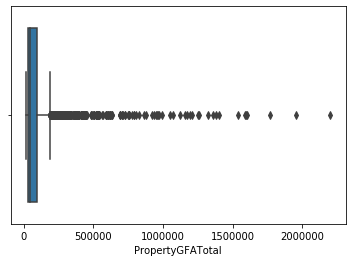

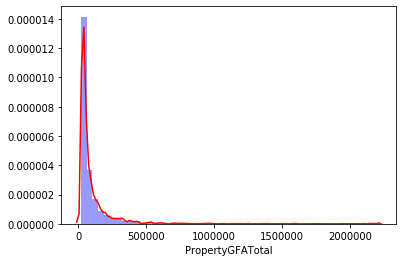


PropertyBuildingGFARate ---------------------------

count    3798.000000
mean        0.933266
std         0.133352
min         0.104977
25%         0.968342
50%         1.000000
75%         1.000000
max         1.000143
Name: PropertyBuildingGFARate, dtype: float64



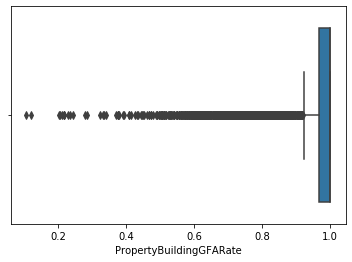

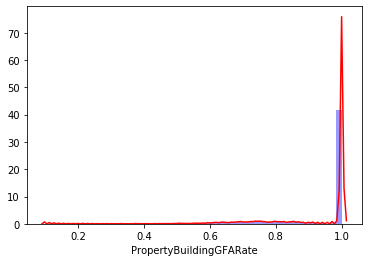


L_PUTGFA ---------------------------

count    3798.000000
mean        0.859900
std         0.262358
min         0.000000
25%         0.719013
50%         0.938025
75%         1.000000
max         6.426849
Name: L_PUTGFA, dtype: float64



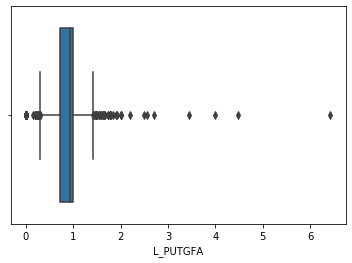

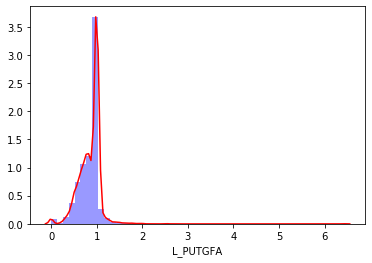


S_PUTGFA ---------------------------

count    3798.000000
mean        0.117421
std         0.156017
min         0.000000
25%         0.000000
50%         0.000000
75%         0.221382
max         1.452054
Name: S_PUTGFA, dtype: float64



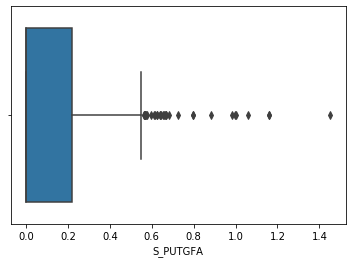

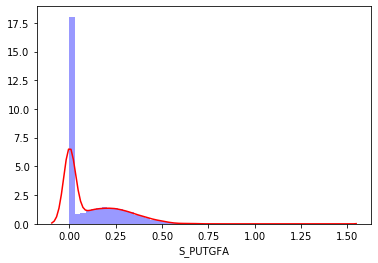


T_PUTGFA ---------------------------

count    3798.000000
mean        0.016280
std         0.048378
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.489796
Name: T_PUTGFA, dtype: float64



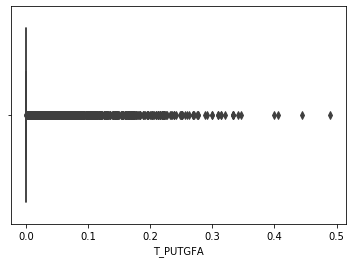

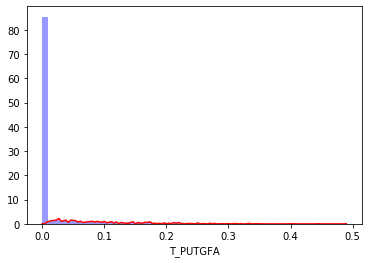

In [470]:
for col in X.columns[15:-1] :
    print(col + " ---------------------------")
    print()
    print(X[col].describe())
    print()
    sns.boxplot(X[col])
    plt.show()
    sns.distplot(X[col], kde_kws={"color": "r"}, hist_kws={'color':"b"})
    plt.show()
    print()

SiteEnergyUseWN(kBtu) ---------------------------

count    3.798000e+03
mean     5.114085e+06
std      1.367921e+07
min      1.726000e+04
25%      9.815622e+05
50%      1.903846e+06
75%      4.329365e+06
max      2.966717e+08
Name: SiteEnergyUseWN(kBtu), dtype: float64



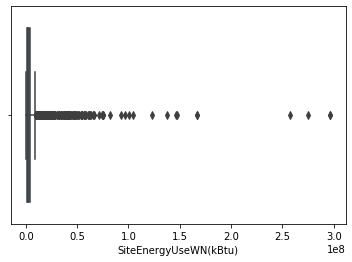

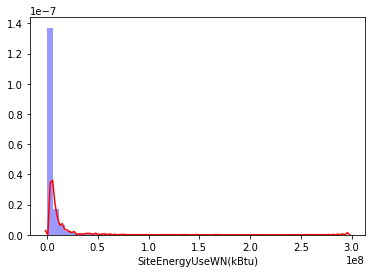

In [471]:
col = "SiteEnergyUseWN(kBtu)"

print(col + " ---------------------------")
print()
print(y[col].describe())
print()
sns.boxplot(y[col])
plt.show()
sns.distplot(y[col], kde_kws={"color": "r"}, hist_kws={'color':"b"})
plt.show()
print()

Etant donné la nature des distributions des données numériques avec lesquelles nous travaillons, on va toutes les passer au log

In [40]:
X.describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyBuildingGFARate,L_PUTGFA,S_PUTGFA,T_PUTGFA
count,3798.000000,3798.000000,3.798000e+03,3798.000000,3798.000000,3798.000000,3798.000000
mean,1.091101,4.798841,9.284734e+04,0.933266,0.859900,0.117421,0.016280
std,0.860033,5.193093,1.468745e+05,0.133352,0.262358,0.156017,0.048378
min,1.000000,1.000000,1.630000e+04,0.104977,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.935100e+04,0.968342,0.719013,0.000000,0.000000
50%,1.000000,4.000000,4.519650e+04,1.000000,0.938025,0.000000,0.000000
75%,1.000000,5.000000,9.376725e+04,1.000000,1.000000,0.221382,0.000000
max,27.000000,76.000000,2.200000e+06,1.000143,6.426849,1.452054,0.489796


Ca tombe bien, on n'a que du positif, et donc on va tout transformes en log(val+1) (pour gérer les 0...)

In [41]:
for col in X.columns[15:-1]:
    X[col] = (X[col] + 1).transform(np.log)

In [42]:
for col in ['SiteEnergyUseWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)']:
    y[col] = (y[col] + 1).transform(np.log)

In [43]:
y.describe()

,ENERGYSTARScore,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e)
count,2913.000000,3798.000000,3798.000000
mean,68.829042,14.620574,3.525373
std,26.449288,1.127881,1.427570
min,1.000000,9.756205,0.113329
25%,54.000000,13.796902,2.272641
50%,76.000000,14.459387,3.497416
75%,90.000000,15.280932,4.528829
max,100.000000,19.508137,9.418018


**SAUVEGARDE** apres FE1

In [44]:
pickle_out = open("Data/X_E1.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [45]:
pickle_out = open("Data/y_E1.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# E2 - données "loggées"

In [223]:
X = pickle.load(open("Data/X_E1.pickle", "rb"))
y = pickle.load(open("Data/y_E1.pickle", "rb"))

In [197]:
y.describe()

,ENERGYSTARScore,SiteEnergyUseWN(kBtu),GHGEmissions(MetricTonsCO2e)
count,2913.000000,3798.000000,3798.000000
mean,68.829042,14.620574,3.525373
std,26.449288,1.127881,1.427570
min,1.000000,9.756205,0.113329
25%,54.000000,13.796902,2.272641
50%,76.000000,14.459387,3.497416
75%,90.000000,15.280932,4.528829
max,100.000000,19.508137,9.418018


In [183]:
X.describe()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyBuildingGFARate,L_PUTGFA,S_PUTGFA,T_PUTGFA
count,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000,3798.000000
mean,0.715520,1.571375,10.953681,0.656540,0.611302,0.102219,0.015135
std,0.158044,0.549556,0.854541,0.075342,0.136503,0.129629,0.043834
min,0.693147,0.693147,9.698982,0.099825,0.000000,0.000000,0.000000
25%,0.693147,1.386294,10.287116,0.677191,0.541750,0.000000,0.000000
50%,0.693147,1.609438,10.718797,0.693147,0.661669,0.000000,0.000000
75%,0.693147,1.791759,11.448581,0.693147,0.693147,0.199983,0.000000
max,3.332205,4.343805,14.603968,0.693219,2.005102,0.896926,0.398639


In [224]:
X = pd.get_dummies(X.drop(["Coord"], axis = 1), drop_first = True)
y = y["SiteEnergyUseWN(kBtu)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state =35)

In [225]:
dummy_mean = DummyRegressor(strategy = "mean")
dummy_mean.fit(X_train, y_train)

e2_dm_RMSE = mean_squared_error(dummy_mean.predict(X_test), y_test, squared = False)
e2_dm_RMSE

1.166408098914634

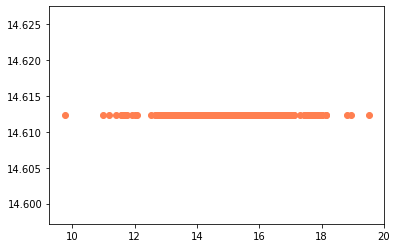

In [186]:
plt.scatter(y_test, dummy_mean.predict(X_test), color = "coral")

In [87]:
np.mean(y)

14.620573915247592

In [226]:
lr_lg_base = LinearRegression()
lr_lg_base.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [227]:
e2_base_lg_RMSE = mean_squared_error(lr_lg_base.predict(X_test), y_test, squared = False)
e2_base_lg_RMSE

14327364727.092041

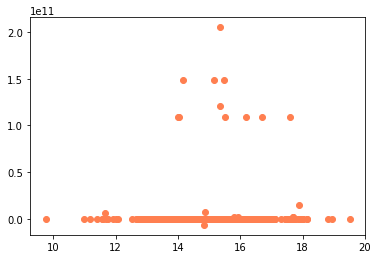

In [189]:
plt.scatter(y_test, lr_lg_base.predict(X_test), color = "coral")

In [228]:
xg_def = xgboost.XGBRegressor()
xg_def.fit(X_train, y_train)
e2_RMSE_xg_base = mean_squared_error(xg_def.predict(X_test), y_test, squared = False)
e2_RMSE_xg_base

0.5191195793847794

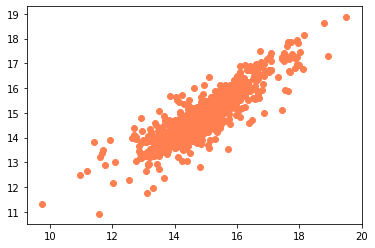

In [213]:
plt.scatter(y_test, xg_def.predict(X_test), color = "coral")

In [216]:
com_e2 = "Test après trans. log des var quant + cible. RL fuckée... XG OK"

new_row_e2 = {"étape": "E2", "dummy_mean":e2_dm_RMSE, "linear Regression":e2_base_lg_RMSE, 
           "xgboost":e2_RMSE_xg_base, "comments" :com_e2}
df_res = df_res.append(new_row_e2, ignore_index=True)

# E3 - Standardisation des données

In [240]:
X = pickle.load(open("Data/X_E1.pickle", "rb"))
y = pickle.load(open("Data/y_E1.pickle", "rb"))

X = pd.get_dummies(X.drop(["Coord"], axis = 1), drop_first = True)
y = y["SiteEnergyUseWN(kBtu)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state =35)

scaler = StandardScaler() # centre la donnée sur 0 (soustrait moyenne) et / par ecart type
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [241]:
#dummy
e3_dummy_mean = DummyRegressor(strategy = "mean")
e3_dummy_mean.fit(X_train_st, y_train)

e3_dm_RMSE = mean_squared_error(e3_dummy_mean.predict(X_test_st), y_test, squared = False)

# RL
e3_lr_base = LinearRegression()
e3_lr_base.fit(X_train_st, y_train)
e3_base_lr_RMSE = mean_squared_error(e3_lr_base.predict(X_test_st), y_test, squared = False)
e3_base_lr_RMSE

# XGB
e3_xg = xgboost.XGBRegressor()
e3_xg.fit(X_train_st, y_train)
e3_RMSE_xg_base = mean_squared_error(e3_xg.predict(X_test_st), y_test, squared = False)
e3_RMSE_xg_base

print(e3_dm_RMSE, e3_base_lr_RMSE, e3_RMSE_xg_base)

1.166408098914634 4960767768450.138 0.5191195793847794


In [351]:
com_e3 = "Test après standardisation des var, pas de changement"

new_row_e3 = {"étape": "E3", "dummy_mean":e3_dm_RMSE, "linear Regression":e3_base_lr_RMSE, 
           "xgboost":e3_RMSE_xg_base, "comments" :com_e3}
df_res = df_res.append(new_row_e3, ignore_index=True)

In [352]:
df_res

,étape,dummy_mean,linear Regression,xgboost,comments
0,E1,1.497435e+07,8.615944e+06,7.392102e+06,"Création d'une baseline avec, dummy_mean, LR, ..."
1,E2,1.166408e+00,1.432736e+10,5.191196e-01,Test après trans. log des var quant + cible. R...
2,E3,1.166408e+00,4.960768e+12,5.191196e-01,"Test après standardisation des var, pas de cha..."


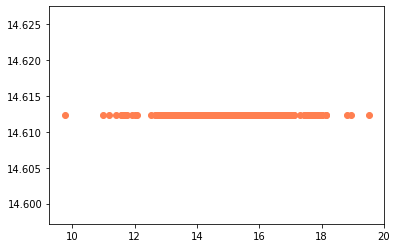

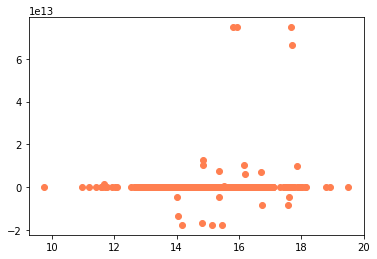

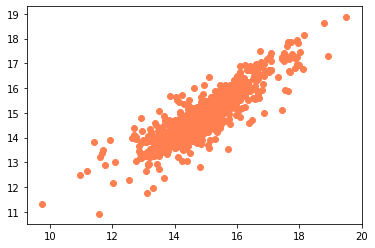

In [243]:
for mod in [e3_dummy_mean, e3_lr_base, e3_xg]:
    plt.scatter(y_test, mod.predict(X_test_st), color = "coral")
    plt.show()

Pas d'amélioration de résultats après standardisation...

# E4 - Lasso

On va tenter un modèle, on verra où il aura un meilleur résultat et quelles variables il aura alors.

In [251]:
X = pickle.load(open("Data/X_E1.pickle", "rb"))
y = pickle.load(open("Data/y_E1.pickle", "rb"))

X = pd.get_dummies(X.drop(["Coord"], axis = 1), drop_first = True)
y = y["SiteEnergyUseWN(kBtu)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state =35)

scaler = StandardScaler() # centre la donnée sur 0 (soustrait moyenne) et / par ecart type
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

coefs = []
error = []
e4_lasso = Lasso()

n_lambdas = 200
lambdas = np.logspace(-5, 6, n_lambdas)

In [252]:
for l in lambdas :
    e4_lasso.set_params(alpha = l)
    e4_lasso.fit(X_train, y_train)
    coefs.append(e4_lasso.coef_)
    error.append([e3_dm_RMSE, mean_squared_error(e4_lasso.predict(X_test), y_test, squared = False)])

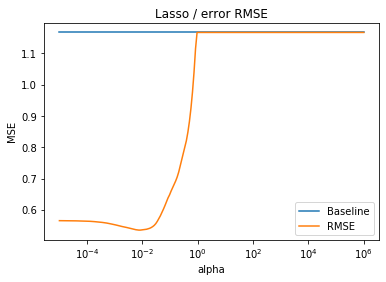

In [253]:
# graph erreur
ax = plt.gca()

ax.plot(lambdas, error)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso / error RMSE')
plt.axis('tight')
plt.legend(["Baseline", "RMSE"])
plt.show()

In [254]:
min(error)

[1.166408098914634, 0.5352656859882383]

In [259]:
len(coefs)

200

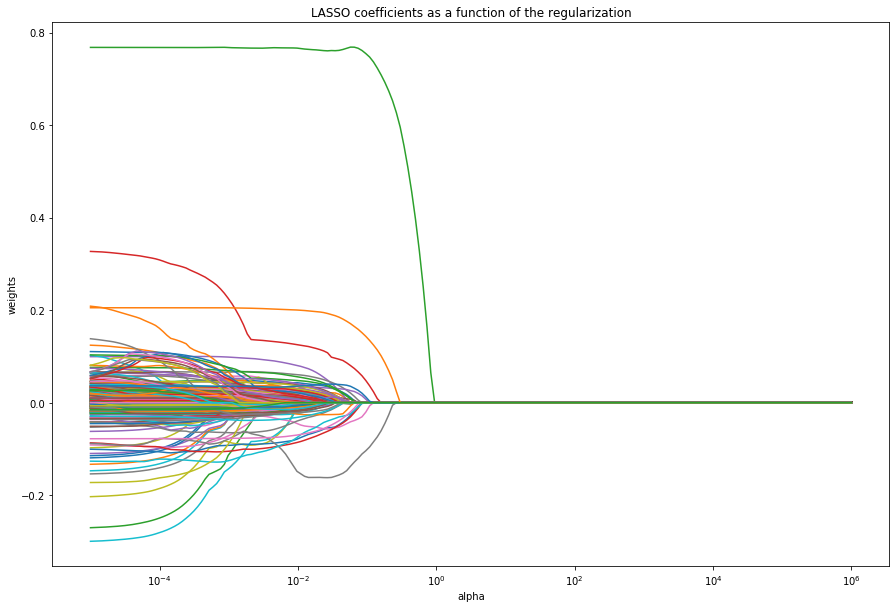

In [315]:
# chemin
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [347]:
# masque des variables qu'on va utiliser pour éliminer des var de notre dataset
mask = (np.array(coefs) != 0)[error.index(min(error))]
mask

array([ True,  True,  True,  True,  True, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False,  True,  True,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [348]:
# sauvegarde mask
pickle_out = open("Data/mask.pickle", "wb")
pickle.dump(mask, pickle_out)
pickle_out.close()

### réduction dimensionnelle avec le masque

In [362]:
# récup des données originales
X = pickle.load(open("Data/X_E1.pickle", "rb"))
y = pickle.load(open("Data/y_E1.pickle", "rb"))

X = pd.get_dummies(X.drop(["Coord"], axis = 1), drop_first = True)
y = y["SiteEnergyUseWN(kBtu)"]

# appli du masque
mask = pickle.load(open("Data/mask.pickle", "rb"))

X = X[[col for col, bol in zip(X.columns.to_list(), mask.tolist()) if bol]]

# reprise du preprocessing d'avant
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state =35)

scaler = StandardScaler() # centre la donnée sur 0 (soustrait moyenne) et / par ecart type
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [363]:
# modeles
#dummy
e4_dummy_mean = DummyRegressor(strategy = "mean")
e4_dummy_mean.fit(X_train, y_train)
e4_dm_RMSE = mean_squared_error(e4_dummy_mean.predict(X_test), y_test, squared = False)

# RL
e4_lr_base = LinearRegression()
e4_lr_base.fit(X_train, y_train)
e4_base_lr_RMSE = mean_squared_error(e4_lr_base.predict(X_test), y_test, squared = False)


# XGB
e4_xg = xgboost.XGBRegressor()
e4_xg.fit(X_train, y_train)
e4_RMSE_xg_base = mean_squared_error(e4_xg.predict(X_test), y_test, squared = False)


print(e4_dm_RMSE, e4_base_lr_RMSE, e4_RMSE_xg_base)

1.166408098914634 270144041289.18192 0.5236004366892307


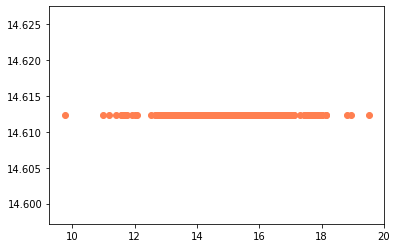

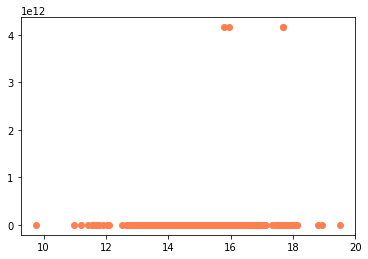

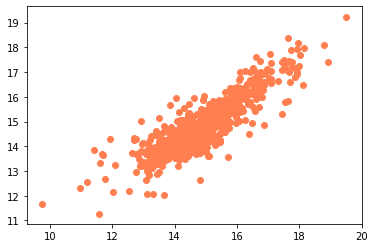

In [364]:
for mod in [e4_dummy_mean, e4_lr_base, e4_xg]:
    plt.scatter(y_test, mod.predict(X_test), color = "coral")
    plt.show()

**INTERPRETATION** :<br>Pour l'instant notre RMSE est env 0.51 / 0.52.<br>Ca revient à dire que, à la louche, y_pred = exp(0.51)y_true, cad, **y_pred = 1.6y_true**. C'est **POURRI** !<br>
Et la reduction dim avec le Lasso n'a rien donné. **Au moins, on a la méthode**...

In [369]:
com_e4 = "reduction dim avec le Lasso n'a rien donné"

new_row_e4 = {"étape": "E4", "dummy_mean":e4_dm_RMSE, "linear Regression":e4_base_lr_RMSE, 
           "xgboost":e4_RMSE_xg_base, "comments" :com_e4}
df_res = df_res.append(new_row_e4, ignore_index=True)

In [371]:
df_res.to_csv("Data/df_res_e4.csv")

# E5 - Réduction du level des var catégorielles

In [372]:
X = pickle.load(open("Data/X_E1.pickle", "rb"))
y = pickle.load(open("Data/y_E1.pickle", "rb"))

## **SCRIPT**

In [436]:
def df_varCat_limited_to_n_levels(n, df, liste_vqual):
    
    df1 = df.copy()
    
    for col in liste_vqual :
        
        top = df1[col].value_counts().index.tolist()[:n-1]
        
        labels = df1[col].value_counts().index.tolist()

        new = [l if l in top else "Reduced_by_Marko" for l in labels]

        dico = {k:v for k, v in zip(labels, new)}

        new_name = f"{col}_red2_{n}"
        df1[new_name] = df1[col].map(dico)
        df1 = df1.drop([col], axis = 1)
        
    return df1, n

### test

In [437]:
# liste des car categ (moins les coord en dernière pos)
l_var_cat = X.select_dtypes(include="object").columns.to_list()[:-1]

# level max atteint par une des var catégorielles de X
X[l_var_cat].describe().loc["unique"].max()

113

In [442]:
df_red_50 = df_varCat_limited_to_n_levels(50, X, l_var_cat)[0]

In [443]:
df_red_50[df_red_50.select_dtypes(include="object").columns.to_list()].describe().loc["unique"]

Coord                                   3705
CouncilDistrictCode_red2_50                7
Neighborhood_red2_50                      13
ZipCode_red2_50                           50
BuildingType_red2_50                       7
PrimaryPropertyType_red2_50               26
LargestPropertyUseType_red2_50            50
SecondLargestPropertyUseType_red2_50      50
ThirdLargestPropertyUseType_red2_50       43
OtherPropertyUse_red2_50                   2
ComplianceStatus_red2_50                   3
YearBuilt_red2_50                         50
DecadeBuilt_red2_50                       12
Steam_red2_50                              2
NaturalGas_red2_50                         2
Other_red2_50                              2
Name: unique, dtype: object

### **Liste de X modifiés à tester**

In [460]:
X = pickle.load(open("Data/X_E1.pickle", "rb"))
y = pickle.load(open("Data/y_E1.pickle", "rb"))

liste_X = []
liste_n = []
l_var_cat = X.select_dtypes(include="object").columns.to_list()[:-1]

for n in range(110, 0, -10):
    
    liste_X.append(df_varCat_limited_to_n_levels(n, X, l_var_cat)[0])
    liste_n.append(df_varCat_limited_to_n_levels(n, X, l_var_cat)[1])

In [461]:
y = y["SiteEnergyUseWN(kBtu)"]

e5_res_dummy = []
e5_res_lr = []
e5_res_xg = []

for X, n in zip(liste_X, liste_n) :
    
    X = pd.get_dummies(X.drop(["Coord"], axis = 1), drop_first = True)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state =35)
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    e5_dummy_mean = DummyRegressor(strategy = "mean")
    e5_dummy_mean.fit(X_train, y_train)
    e5_dm_RMSE = mean_squared_error(e5_dummy_mean.predict(X_test), y_test, squared = False)
    e5_res_dummy.append(e5_dm_RMSE)
    
    # RL
    e5_lr_base = LinearRegression()
    e5_lr_base.fit(X_train, y_train)
    e5_base_lr_RMSE = mean_squared_error(e5_lr_base.predict(X_test), y_test, squared = False)
    e5_res_lr.append(e5_base_lr_RMSE)

    # XGB
    e5_xg = xgboost.XGBRegressor()
    e5_xg.fit(X_train, y_train)
    e5_RMSE_xg_base = mean_squared_error(e5_xg.predict(X_test), y_test, squared = False)
    e5_res_xg.append(e5_RMSE_xg_base)
    
df_res_e5 = pd.DataFrame(list(zip(liste_n, e5_res_dummy, e5_res_lr, e5_res_xg)), 
                         columns =['n', 'Dummy', 'RLin', 'XG_def']) 

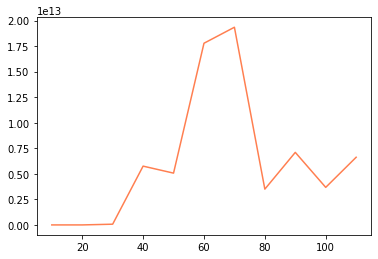

In [463]:
plt.plot(df_res_e5["n"], df_res_e5["RLin"], color = "coral")
plt.show()

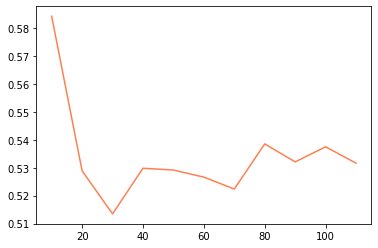

In [464]:
plt.plot(df_res_e5["n"], df_res_e5["XG_def"], color = "coral")
plt.show()

On va recommencer en faisant varier n entre 113 et 1

In [471]:
X = pickle.load(open("Data/X_E1.pickle", "rb"))
y = pickle.load(open("Data/y_E1.pickle", "rb"))

liste_X = []
liste_n = []
l_var_cat = X.select_dtypes(include="object").columns.to_list()[:-1]

for n in range(113, 1, -1):
    
    liste_X.append(df_varCat_limited_to_n_levels(n, X, l_var_cat)[0])
    liste_n.append(df_varCat_limited_to_n_levels(n, X, l_var_cat)[1])

In [472]:
y = y["SiteEnergyUseWN(kBtu)"]

e5_res_dummy = []
e5_res_lr = []
e5_res_xg = []

for X, n in zip(liste_X, liste_n) :
    
    X = pd.get_dummies(X.drop(["Coord"], axis = 1), drop_first = True)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state =35)
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    e5_dummy_mean = DummyRegressor(strategy = "mean")
    e5_dummy_mean.fit(X_train, y_train)
    e5_dm_RMSE = mean_squared_error(e5_dummy_mean.predict(X_test), y_test, squared = False)
    e5_res_dummy.append(e5_dm_RMSE)
    
    # RL
    e5_lr_base = LinearRegression()
    e5_lr_base.fit(X_train, y_train)
    e5_base_lr_RMSE = mean_squared_error(e5_lr_base.predict(X_test), y_test, squared = False)
    e5_res_lr.append(e5_base_lr_RMSE)

    # XGB
    e5_xg = xgboost.XGBRegressor()
    e5_xg.fit(X_train, y_train)
    e5_RMSE_xg_base = mean_squared_error(e5_xg.predict(X_test), y_test, squared = False)
    e5_res_xg.append(e5_RMSE_xg_base)
    
df_res_e5_3 = pd.DataFrame(list(zip(liste_n, e5_res_dummy, e5_res_lr, e5_res_xg)), 
                         columns =['n', 'Dummy', 'RLin', 'XG_def'])

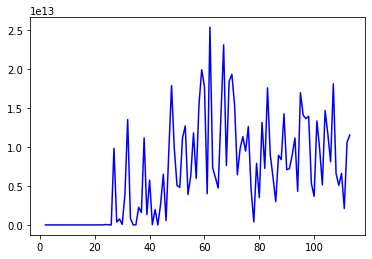

In [473]:
plt.plot(df_res_e5_2["n"], df_res_e5_2["RLin"], color = "blue")
plt.show()

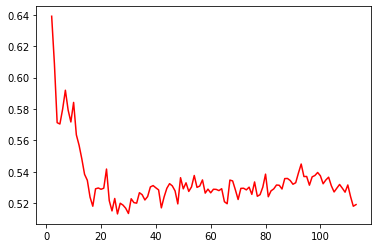

In [474]:
plt.plot(df_res_e5_2["n"], df_res_e5_2["XG_def"], color = "red")
plt.show()

In [475]:
df_res_e5_2

,n,Dummy,RLin,XG_def
0,113,1.166408,1.155409e+13,0.519120
1,112,1.166408,1.061928e+13,0.518076
2,111,1.166408,2.107605e+12,0.524253
3,110,1.166408,6.622524e+12,0.531605
4,109,1.166408,5.080904e+12,0.527031
...,...,...,...,...
107,6,1.166408,5.778718e-01,0.579878
108,5,1.166408,5.796914e-01,0.570412
109,4,1.166408,5.810627e-01,0.571257
110,3,1.166408,6.072024e-01,0.608780


Meilleur **n** pour **RL**

In [501]:
df_res_e5_2.describe()

,n,Dummy,RLin,XG_def
count,112.000000,1.120000e+02,1.120000e+02,112.000000
mean,57.500000,1.166408e+00,6.650861e+12,0.534325
std,32.475632,8.921703e-16,6.286098e+12,0.018781
min,2.000000,1.166408e+00,5.250910e-01,0.513183
25%,29.750000,1.166408e+00,4.863914e+10,0.525586
50%,57.500000,1.166408e+00,5.865926e+12,0.529633
75%,85.250000,1.166408e+00,1.119689e+13,0.535036
max,113.000000,1.166408e+00,2.540960e+13,0.639005


In [494]:
df_res_e5_2.min()

n         2.000000
Dummy     1.166408
RLin      0.525091
XG_def    0.513183
dtype: float64

In [507]:
np.exp(0.513183)

1.6706002617167697

In [519]:
X.columns

Index(['CouncilDistrictCode', 'Neighborhood', 'ZipCode', 'BuildingType',
       'PrimaryPropertyType', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'OtherPropertyUse', 'ComplianceStatus', 'YearBuilt', 'DecadeBuilt',
       'Steam', 'NaturalGas', 'Other', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyBuildingGFARate', 'L_PUTGFA', 'S_PUTGFA',
       'T_PUTGFA', 'Coord'],
      dtype='object')

In [542]:
X = pickle.load(open("Data/X_E1.pickle", "rb"))
y = pickle.load(open("Data/y_E1.pickle", "rb"))

In [543]:
sel_feat = ['CouncilDistrictCode', 'BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 
            'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'ComplianceStatus', 
            'DecadeBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 
            'PropertyBuildingGFARate']

In [544]:
X = X[sel_feat]

In [545]:
# liste des car categ (moins les coord en dernière pos)
l_var_cat = X.select_dtypes(include="object").columns.to_list()[:-1]

# level max atteint par une des var catégorielles de X
X[l_var_cat].describe().loc["unique"].max()

55

In [546]:
liste_X = []
liste_n = []
l_var_cat = X.select_dtypes(include="object").columns.to_list()[:-1]

for n in range(55, 1, -1):
    
    liste_X.append(df_varCat_limited_to_n_levels(n, X, l_var_cat)[0])
    liste_n.append(df_varCat_limited_to_n_levels(n, X, l_var_cat)[1])

In [548]:
len(liste_X)

54

In [531]:
y = y["SiteEnergyUseWN(kBtu)"]

e5_res_dummy = []
e5_res_lr = []
e5_res_xg = []

for X, n in zip(liste_X, liste_n) :
    
    X = pd.get_dummies(X, drop_first = True)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state =35)
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    e5_dummy_mean = DummyRegressor(strategy = "mean")
    e5_dummy_mean.fit(X_train, y_train)
    e5_dm_RMSE = mean_squared_error(e5_dummy_mean.predict(X_test), y_test, squared = False)
    e5_res_dummy.append(e5_dm_RMSE)
    
    # RL
    e5_lr_base = LinearRegression()
    e5_lr_base.fit(X_train, y_train)
    e5_base_lr_RMSE = mean_squared_error(e5_lr_base.predict(X_test), y_test, squared = False)
    e5_res_lr.append(e5_base_lr_RMSE)

    # XGB
    e5_xg = xgboost.XGBRegressor()
    e5_xg.fit(X_train, y_train)
    e5_RMSE_xg_base = mean_squared_error(e5_xg.predict(X_test), y_test, squared = False)
    e5_res_xg.append(e5_RMSE_xg_base)
    
df_res_e5_3 = pd.DataFrame(list(zip(liste_n, e5_res_dummy, e5_res_lr, e5_res_xg)), 
                         columns =['n', 'Dummy', 'RLin', 'XG_def'])

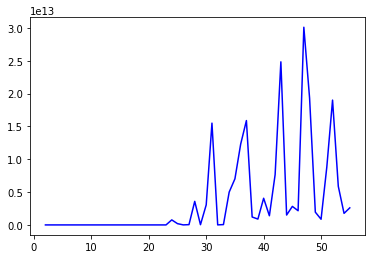

In [554]:
plt.plot(df_res_e5_3["n"], df_res_e5_3["RLin"], color = "blue")
plt.show()

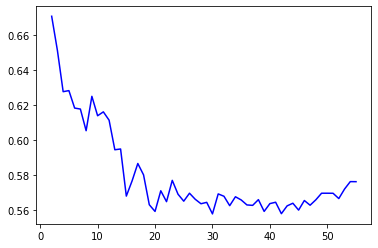

In [553]:
plt.plot(df_res_e5_3["n"], df_res_e5_3["XG_def"], color = "blue")
plt.show()

### 

In [310]:
df_lasso = pd.DataFrame(np.array(coefs), columns = [X.columns[i] for i in range (np.array(coefs).shape[1])])
df_lasso.loc[52]

NumberofBuildings          0.043077
NumberofFloors             0.018626
PropertyGFATotal           0.766944
PropertyBuildingGFARate    0.007938
L_PUTGFA                   0.084217
                             ...   
DecadeBuilt_2000          -0.000000
DecadeBuilt_2010          -0.014816
Steam_1                    0.034734
NaturalGas_1               0.201138
Other_1                   -0.000000
Name: 52, Length: 383, dtype: float64

In [293]:
mask = [df_lasso != 0][0].loc[error.index(min(error))]

In [294]:
mask.value_counts()

False    192
True     191
Name: 52, dtype: int64

array([ True,  True,  True,  True,  True, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False,  True, False,  True,  True,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

In [308]:
zero.shape

(200, 383)

In [ ]:
[error.index(min(error))]

In [ ]:
.loc[error.index(min(error))]

In [635]:
min(error)

[1.166408098914634, 0.5300305726492165]

In [641]:
for l in lambdas :
    lasso.set_params(alpha = l)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    error.append([dm_lg_RMSE, mean_squared_error(lasso.predict(X_test), y_test, squared = False)])

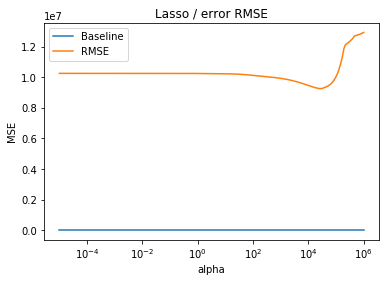

In [642]:
ax = plt.gca()

ax.plot(lambdas, error)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso / error RMSE')
plt.axis('tight')
plt.legend(["Baseline", "RMSE"])
plt.show()

In [643]:
np.exp(0)

1.0

In [645]:
np.exp(0.1)

1.1051709180756477

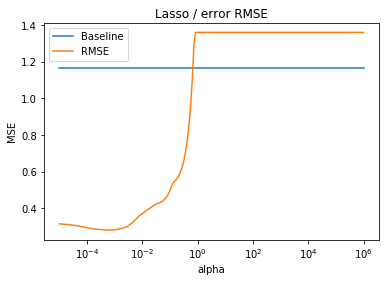

In [629]:
ax = plt.gca()

ax.plot(lambdas, error)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso / error RMSE')
plt.axis('tight')
plt.legend(["Baseline", "RMSE"])
plt.show()

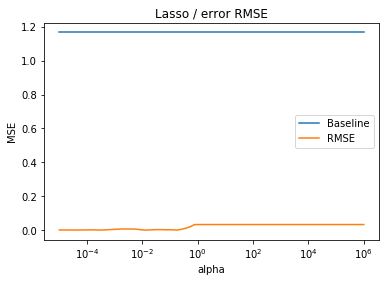

In [623]:
ax = plt.gca()

ax.plot(lambdas, error)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso / error RMSE')
plt.axis('tight')
plt.legend(["Baseline", "RMSE"])
plt.show()

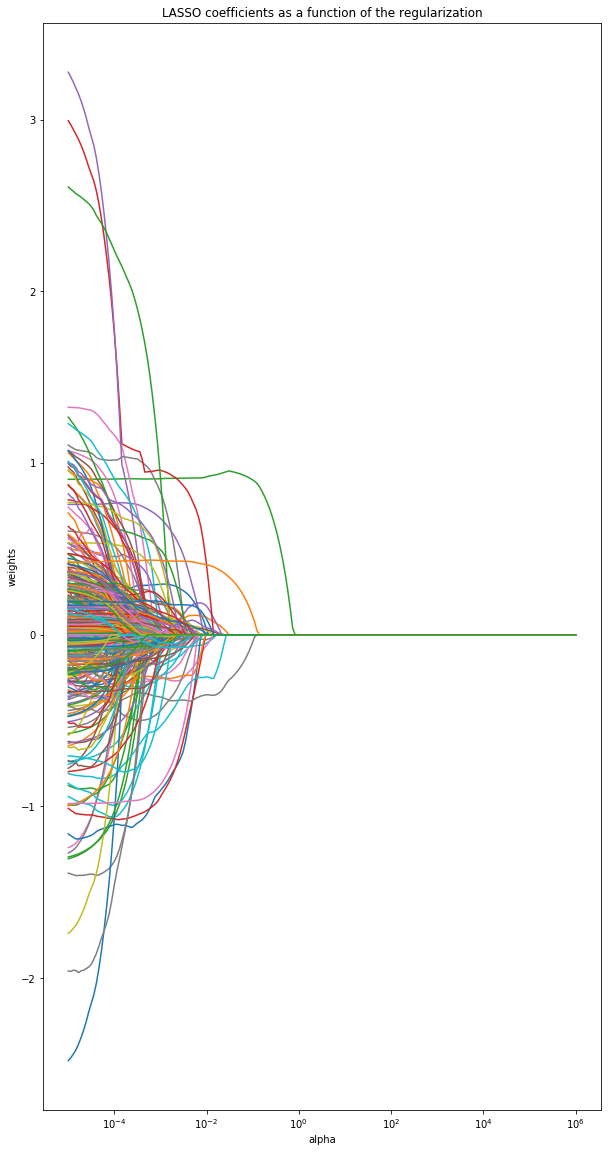

In [624]:
fig = plt.figure(figsize=(10,20))
ax = plt.gca()

ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [292]:
coefs = []
error = []
lasso = Lasso()

n_lambdas = 200
lambdas = np.logspace(-5, 6, n_lambdas)

In [271]:
for l in lambdas :
    lasso.set_params(alpha = l)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    error.append([baseline_RMSLE, np.sqrt(np.mean((np.log(lasso.predict(X_test) + 1) - np.log(y_test + 1))**2))])

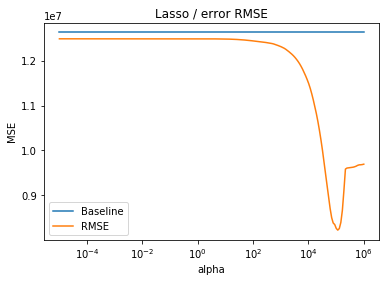

In [272]:
ax = plt.gca()

ax.plot(lambdas, error)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso / error RMSE')
plt.axis('tight')
plt.legend(["Baseline", "RMSE"])
plt.show()

In [273]:
min(error)

[12632858.757546557, 8224413.034221165]

In [254]:
error = np.array(error).reshape(2,-1)

In [ ]:
np.sqrt(np.mean((lasso.predict(X_test) - y_test)**2))

In [274]:
np.sqrt((15 - 10)**2)

5.0

In [276]:
np.sqrt((1005 - 10000)**2)

8995.0

In [282]:
np.sqrt((np.log(15+1) - np.log(10+1))**2)

0.3746934494414105

In [283]:
np.sqrt((np.log(1005+1) - np.log(1000+1))**2)

0.004982571344464226

In [249]:
der = pd.DataFrame(error[1], columns = ["RMSE"], index = lambdas)
der

ValueError: Shape of passed values is (2, 1), indices imply (200, 1)

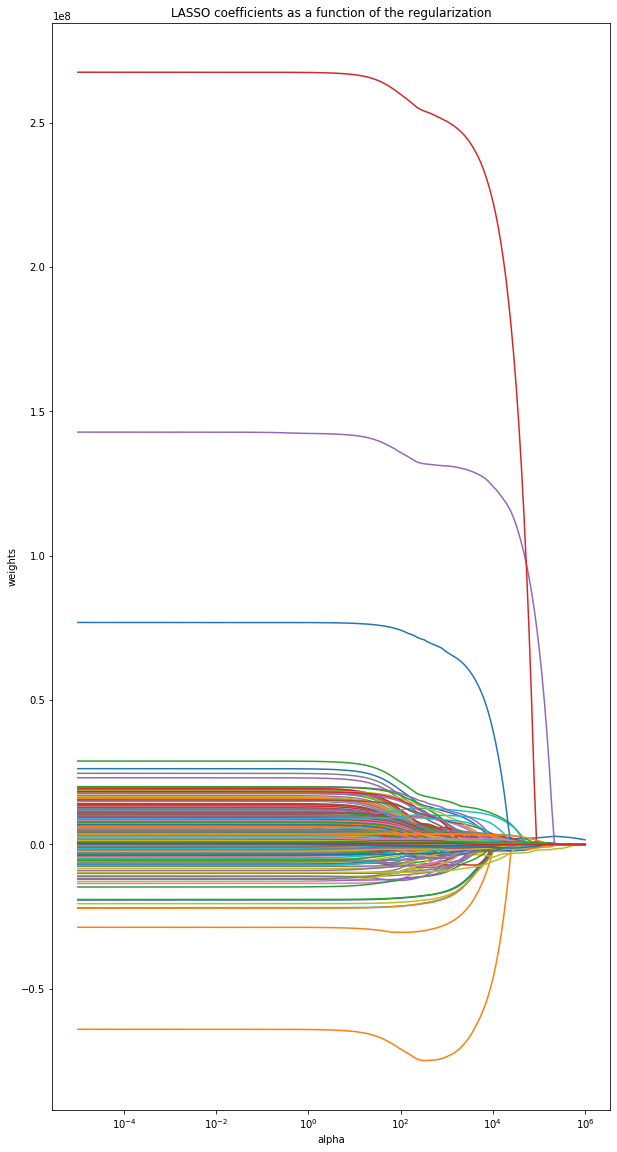

In [224]:

fig = plt.figure(figsize=(10,20))
ax = plt.gca()

ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('LASSO coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [134]:
np.array(coefs).shape

(300, 384)

In [194]:
df = pd.DataFrame(np.array(coefs), columns = [X.columns[i] for i in range (np.array(coefs).shape[1])])

In [195]:
df

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyBuildingGFARate,L_PUTGFA,S_PUTGFA,T_PUTGFA,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,...,DecadeBuilt_1950,DecadeBuilt_1960,DecadeBuilt_1970,DecadeBuilt_1980,DecadeBuilt_1990,DecadeBuilt_2000,DecadeBuilt_2010,Steam_1,NaturalGas_1,Other_1
0,7.977778e+05,-103932.571175,55.006017,2.860257e+06,2.372492e+06,1.251401e+06,9.500551e+06,-152981.235722,468821.800164,-460066.381745,...,245396.225048,253149.935126,215258.821306,177197.613240,193422.981328,133980.586525,148643.680933,3.760163e+06,609342.882287,284963.781575
1,7.977778e+05,-103932.571137,55.006017,2.860257e+06,2.372492e+06,1.251401e+06,9.500551e+06,-152981.236216,468821.799261,-460066.383478,...,245396.211969,253149.954150,215258.841328,177197.639843,193423.005791,133980.614757,148643.624841,3.760163e+06,609342.882326,284963.781592
2,7.977778e+05,-103932.571097,55.006017,2.860257e+06,2.372492e+06,1.251401e+06,9.500551e+06,-152981.236749,468821.798285,-460066.385350,...,245396.197843,253149.974698,215258.862954,177197.668575,193423.032212,133980.645250,148643.564259,3.760163e+06,609342.882369,284963.781611
3,7.977778e+05,-103932.571053,55.006017,2.860257e+06,2.372492e+06,1.251401e+06,9.500551e+06,-152981.237326,468821.797232,-460066.387373,...,245396.182586,253149.996890,215258.886311,177197.699607,193423.060748,133980.678183,148643.498828,3.760163e+06,609342.882415,284963.781632
4,7.977778e+05,-103932.571005,55.006017,2.860257e+06,2.372492e+06,1.251401e+06,9.500551e+06,-152981.237948,468821.796094,-460066.389557,...,245396.166107,253150.020859,215258.911538,177197.733123,193423.091569,133980.713753,148643.428158,3.760163e+06,609342.882464,284963.781654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.172417e+06,30786.618410,54.496133,0.000000e+00,2.580961e+05,0.000000e+00,0.000000e+00,-0.000000,432555.867083,0.000000,...,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-736657.581565,1.763881e+06,701511.943129,0.000000
296,2.209446e+06,36481.812143,54.709467,0.000000e+00,1.070166e+05,0.000000e+00,0.000000e+00,-0.000000,424764.597998,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-661812.955641,1.617510e+06,680688.981311,0.000000
297,2.248129e+06,42055.904288,54.957645,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000,422490.543150,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-581572.151698,1.454893e+06,656588.512745,0.000000
298,2.279461e+06,35226.734545,55.340572,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000,425365.743656,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-486448.160534,1.325165e+06,636942.778095,0.000000


In [196]:
df[df != 0]

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyBuildingGFARate,L_PUTGFA,S_PUTGFA,T_PUTGFA,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,...,DecadeBuilt_1950,DecadeBuilt_1960,DecadeBuilt_1970,DecadeBuilt_1980,DecadeBuilt_1990,DecadeBuilt_2000,DecadeBuilt_2010,Steam_1,NaturalGas_1,Other_1
0,7.977778e+05,-103932.571175,55.006017,2.860257e+06,2.372492e+06,1.251401e+06,9.500551e+06,-152981.235722,468821.800164,-460066.381745,...,245396.225048,253149.935126,215258.821306,177197.613240,193422.981328,133980.586525,148643.680933,3.760163e+06,609342.882287,284963.781575
1,7.977778e+05,-103932.571137,55.006017,2.860257e+06,2.372492e+06,1.251401e+06,9.500551e+06,-152981.236216,468821.799261,-460066.383478,...,245396.211969,253149.954150,215258.841328,177197.639843,193423.005791,133980.614757,148643.624841,3.760163e+06,609342.882326,284963.781592
2,7.977778e+05,-103932.571097,55.006017,2.860257e+06,2.372492e+06,1.251401e+06,9.500551e+06,-152981.236749,468821.798285,-460066.385350,...,245396.197843,253149.974698,215258.862954,177197.668575,193423.032212,133980.645250,148643.564259,3.760163e+06,609342.882369,284963.781611
3,7.977778e+05,-103932.571053,55.006017,2.860257e+06,2.372492e+06,1.251401e+06,9.500551e+06,-152981.237326,468821.797232,-460066.387373,...,245396.182586,253149.996890,215258.886311,177197.699607,193423.060748,133980.678183,148643.498828,3.760163e+06,609342.882415,284963.781632
4,7.977778e+05,-103932.571005,55.006017,2.860257e+06,2.372492e+06,1.251401e+06,9.500551e+06,-152981.237948,468821.796094,-460066.389557,...,245396.166107,253150.020859,215258.911538,177197.733123,193423.091569,133980.713753,148643.428158,3.760163e+06,609342.882464,284963.781654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.172417e+06,30786.618410,54.496133,NaN,2.580961e+05,NaN,NaN,NaN,432555.867083,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-736657.581565,1.763881e+06,701511.943129,NaN
296,2.209446e+06,36481.812143,54.709467,NaN,1.070166e+05,NaN,NaN,NaN,424764.597998,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-661812.955641,1.617510e+06,680688.981311,NaN
297,2.248129e+06,42055.904288,54.957645,NaN,NaN,NaN,NaN,NaN,422490.543150,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-581572.151698,1.454893e+06,656588.512745,NaN
298,2.279461e+06,35226.734545,55.340572,NaN,NaN,NaN,NaN,NaN,425365.743656,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-486448.160534,1.325165e+06,636942.778095,NaN


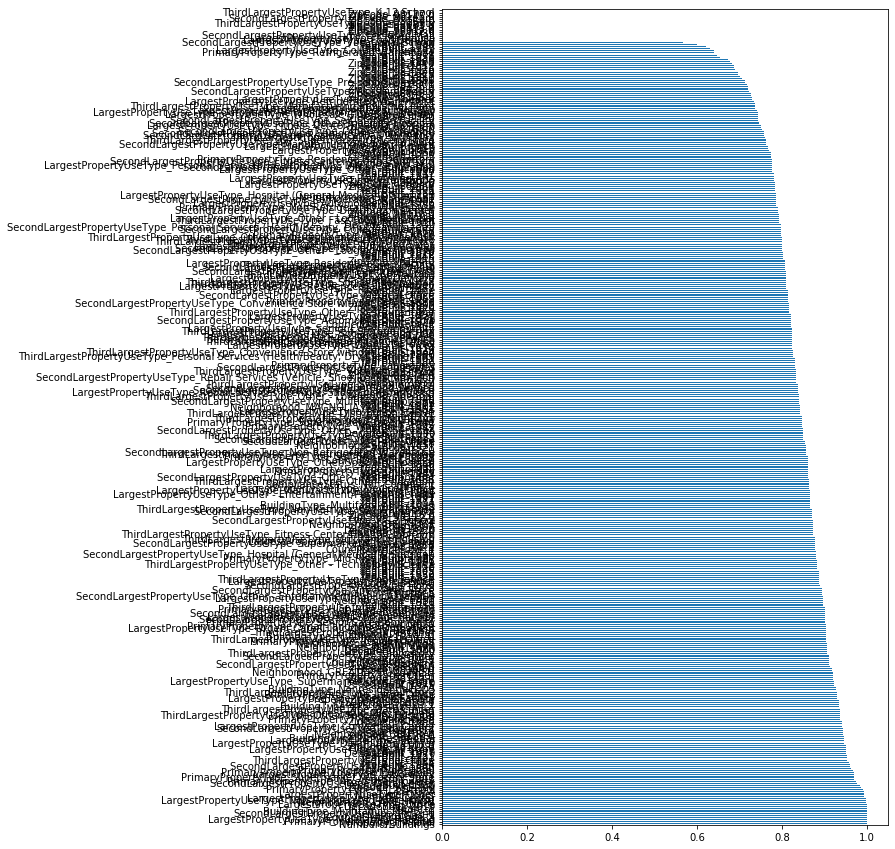

In [214]:
fig = plt.figure(figsize = (8,15))
df[df != 0].notnull().mean().sort_values(ascending = False).plot.barh()
plt.show()

In [209]:
varParImportanceCroiss = df[df != 0].notnull().mean().sort_values(ascending = True).index.to_list()

In [213]:
varParImportanceCroiss[:10]

['ThirdLargestPropertyUseType_K-12 School',
 'ZipCode_98127.0',
 'ZipCode_98145.0',
 'SecondLargestPropertyUseType_Museum',
 'ZipCode_98164.0',
 'ThirdLargestPropertyUseType_Other - Utility',
 'ZipCode_98033.0',
 'ZipCode_98191.0',
 'ZipCode_98013.0',
 'ZipCode_98012.0']